In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv("dea_data.csv")

In [3]:
data.head(5)

,Gene,Control1,Control2,Control3,Control4,Control5,Control6,Control7,Control8,Control9,...,Treatment16,Treatment17,Treatment18,Treatment19,Treatment20,Treatment21,Treatment22,Treatment23,Treatment24,Treatment25
0,Gene1,56,97,19,76,65,25,87,91,79,...,55,59,68,7,55,11,25,77,43,22
1,Gene2,8,93,64,18,13,94,57,6,88,...,91,66,44,89,84,86,57,28,30,93
2,Gene3,64,45,33,19,49,69,93,75,13,...,82,7,5,9,94,18,31,13,83,19
3,Gene4,94,46,81,55,67,56,8,98,27,...,74,76,31,13,66,41,55,48,28,83
4,Gene5,63,36,92,56,66,62,56,16,43,...,77,63,74,84,97,7,24,63,40,23


In [5]:
control_cols=[i for i in data.columns if "Control" in i]
treatment_cols=[i for i in data.columns if "Treatment" in i]

print("Column of controls:")
print(control_cols)
print("Column of Treatment:")
print(treatment_cols)

Column of controls:
['Control1', 'Control2', 'Control3', 'Control4', 'Control5', 'Control6', 'Control7', 'Control8', 'Control9', 'Control10', 'Control11', 'Control12', 'Control13', 'Control14', 'Control15', 'Control16', 'Control17', 'Control18', 'Control19', 'Control20', 'Control21', 'Control22', 'Control23', 'Control24', 'Control25']
Column of Treatment:
['Treatment1', 'Treatment2', 'Treatment3', 'Treatment4', 'Treatment5', 'Treatment6', 'Treatment7', 'Treatment8', 'Treatment9', 'Treatment10', 'Treatment11', 'Treatment12', 'Treatment13', 'Treatment14', 'Treatment15', 'Treatment16', 'Treatment17', 'Treatment18', 'Treatment19', 'Treatment20', 'Treatment21', 'Treatment22', 'Treatment23', 'Treatment24', 'Treatment25']


In [6]:
#calculate the average expression level of each gene under the control condition
for gene in data["Gene"].head(100):
    gene_data=data[data["Gene"]==gene]
    

    control_mean=gene_data[control_cols].mean(axis=1).values[0]

    print(f"Gene:{gene}")
    print(f"Average Expression Level(Under control condition):{control_mean:.2f}")
      



Gene:Gene1
Average Expression Level(Under control condition):53.52
Gene:Gene2
Average Expression Level(Under control condition):47.08
Gene:Gene3
Average Expression Level(Under control condition):45.16
Gene:Gene4
Average Expression Level(Under control condition):51.44
Gene:Gene5
Average Expression Level(Under control condition):48.04
Gene:Gene6
Average Expression Level(Under control condition):51.12
Gene:Gene7
Average Expression Level(Under control condition):48.36
Gene:Gene8
Average Expression Level(Under control condition):58.00
Gene:Gene9
Average Expression Level(Under control condition):57.80
Gene:Gene10
Average Expression Level(Under control condition):48.20
Gene:Gene11
Average Expression Level(Under control condition):46.88
Gene:Gene12
Average Expression Level(Under control condition):49.60
Gene:Gene13
Average Expression Level(Under control condition):48.04
Gene:Gene14
Average Expression Level(Under control condition):52.84
Gene:Gene15
Average Expression Level(Under control condit

In [7]:
#calculate the average expression level of each gene under the treatment condition
for gene in data["Gene"].head(100):
    gene_data=data[data["Gene"]==gene]
    

    treatment_mean=gene_data[treatment_cols].mean(axis=1).values[0]

    print(f"Gene:{gene}")
    print(f"Average Expression Level(Under Treatment):{treatment_mean:.2f}")
      

Gene:Gene1
Average Expression Level(Under Treatment):54.88
Gene:Gene2
Average Expression Level(Under Treatment):63.28
Gene:Gene3
Average Expression Level(Under Treatment):47.92
Gene:Gene4
Average Expression Level(Under Treatment):53.56
Gene:Gene5
Average Expression Level(Under Treatment):53.24
Gene:Gene6
Average Expression Level(Under Treatment):45.72
Gene:Gene7
Average Expression Level(Under Treatment):45.00
Gene:Gene8
Average Expression Level(Under Treatment):41.80
Gene:Gene9
Average Expression Level(Under Treatment):50.56
Gene:Gene10
Average Expression Level(Under Treatment):60.92
Gene:Gene11
Average Expression Level(Under Treatment):54.12
Gene:Gene12
Average Expression Level(Under Treatment):50.44
Gene:Gene13
Average Expression Level(Under Treatment):51.80
Gene:Gene14
Average Expression Level(Under Treatment):44.08
Gene:Gene15
Average Expression Level(Under Treatment):47.68
Gene:Gene16
Average Expression Level(Under Treatment):52.80
Gene:Gene17
Average Expression Level(Under Treatm

In [8]:
#fint the gene shows the highest average expression under the treatment
data["treatment_avg"]=data[treatment_cols].mean(axis=1)
highest_gene=data.loc[data["treatment_avg"].idxmax()]

print("Gene with highest average expression under the treatment:")
print(f"Gene:{highest_gene['Gene']}")
print(f"Treatment averege expression level:{highest_gene['treatment_avg']:.2f}")

Gene with highest average expression under the treatment:
Gene:Gene98
Treatment averege expression level:64.40


In [15]:
#calculate the difference between averege tretement and control expression for each gene
data["control_avg"]=data[control_cols].mean(axis=1)

data["expression_difference"]=data["treatment_avg"]-data["control_avg"]

print(data[["Gene","treatment_avg","control_avg","expression_difference"]])

       Gene  treatment_avg  control_avg  expression_difference
0     Gene1          54.88        53.52                   1.36
1     Gene2          63.28        47.08                  16.20
2     Gene3          47.92        45.16                   2.76
3     Gene4          53.56        51.44                   2.12
4     Gene5          53.24        48.04                   5.20
..      ...            ...          ...                    ...
95   Gene96          45.28        51.56                  -6.28
96   Gene97          52.36        49.32                   3.04
97   Gene98          64.40        45.40                  19.00
98   Gene99          55.60        58.08                  -2.48
99  Gene100          48.00        51.72                  -3.72

[100 rows x 4 columns]


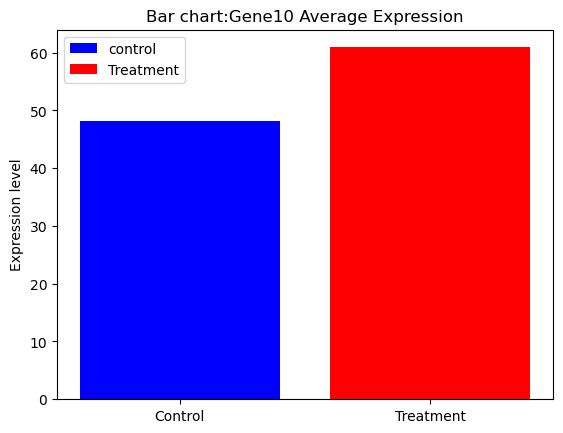

In [9]:
#bar chart
gene="Gene10"
gene_data=data[data["Gene"]==gene]

control_mean=gene_data[control_cols].mean(axis=1).values[0]
treatment_mean=gene_data[treatment_cols].mean(axis=1).values[0]

plt.bar("Control",control_mean,color="blue",label="control")
plt.bar("Treatment",treatment_mean,color="red",label="Treatment")
plt.title(f"Bar chart:{gene} Average Expression")
plt.ylabel("Expression level")
plt.legend()
plt.show()

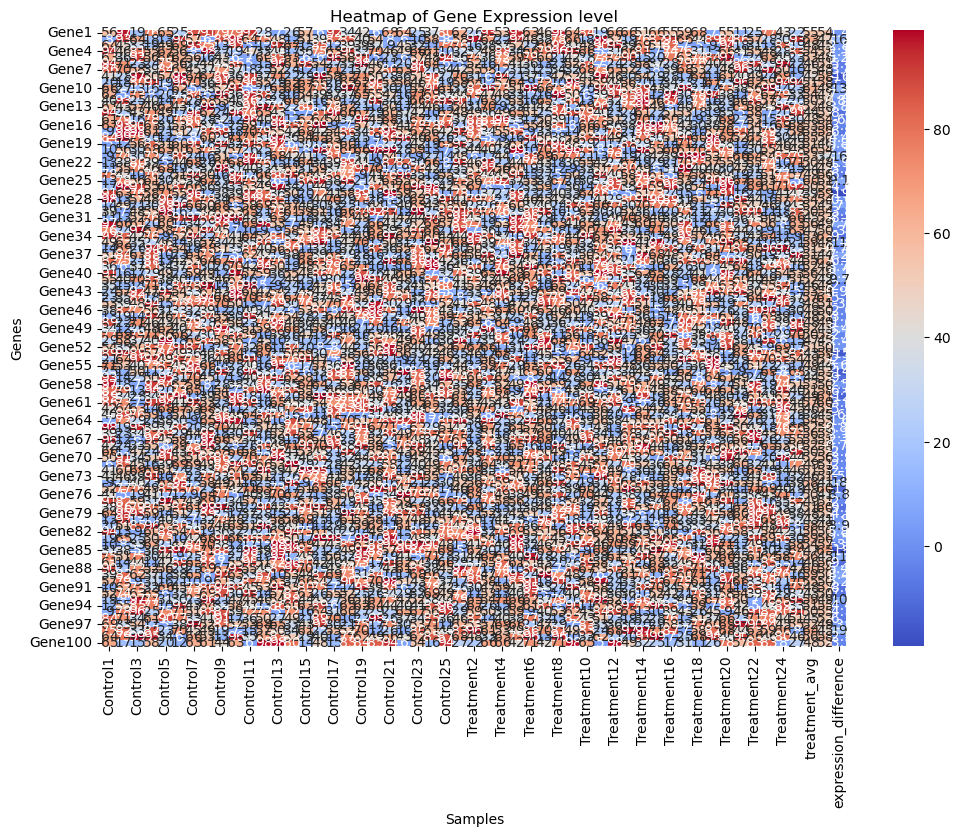

In [37]:
#heat map
heatmap_data=data.set_index('Gene')
heatmap=heatmap_data.head(100)

plt.figure(figsize=(12,8))
sns.heatmap(heatmap,cmap="coolwarm",annot=True)
plt.title("Heatmap of Gene Expression level")
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.show()

In [16]:
#identify the gene that are upregulated(treatmentr_avg>control_avg)

upregulated_gene=data[data["treatment_avg"]>data["control_avg"]]
print("Upregulated Gene:")
print(upregulated_gene[["Gene","control_avg","treatment_avg","expression_difference"]])

Upregulated Gene:
      Gene  control_avg  treatment_avg  expression_difference
0    Gene1        53.52          54.88                   1.36
1    Gene2        47.08          63.28                  16.20
2    Gene3        45.16          47.92                   2.76
3    Gene4        51.44          53.56                   2.12
4    Gene5        48.04          53.24                   5.20
9   Gene10        48.20          60.92                  12.72
10  Gene11        46.88          54.12                   7.24
11  Gene12        49.60          50.44                   0.84
12  Gene13        48.04          51.80                   3.76
17  Gene18        50.20          54.60                   4.40
18  Gene19        45.56          51.40                   5.84
19  Gene20        53.52          55.84                   2.32
20  Gene21        36.92          53.24                  16.32
21  Gene22        48.00          49.92                   1.92
24  Gene25        50.60          59.72              

In [41]:
#identify the gene that are downregulated(treatmentr_avg<control_avg)

downregulated_gene=data[data["treatment_avg"]<data["control_avg"]]
print("Downregulated Gene:")
print(downregulated_gene[["Gene","control_avg","treatment_avg","expression_difference"]])

Downregulated Gene:
       Gene  control_avg  treatment_avg  expression_difference
5     Gene6        51.12          45.72                  -5.40
6     Gene7        48.36          45.00                  -3.36
7     Gene8        58.00          41.80                 -16.20
8     Gene9        57.80          50.56                  -7.24
13   Gene14        52.84          44.08                  -8.76
14   Gene15        53.64          47.68                  -5.96
15   Gene16        56.32          52.80                  -3.52
16   Gene17        59.32          52.56                  -6.76
22   Gene23        46.76          43.52                  -3.24
23   Gene24        55.52          48.88                  -6.64
25   Gene26        54.52          49.92                  -4.60
26   Gene27        58.56          39.40                 -19.16
27   Gene28        54.24          53.64                  -0.60
29   Gene30        54.04          50.24                  -3.80
30   Gene31        52.84          4

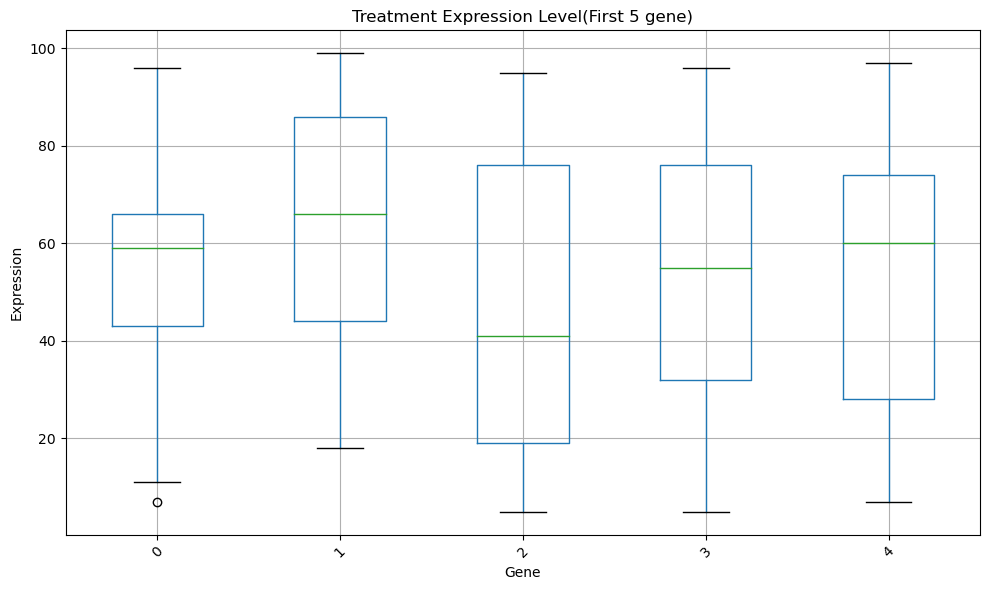

In [13]:
#display a box plot for the treatment expression level for the first 5 gene
first_5_gene=data.index[:5]
treatment_data_5=data.loc[first_5_gene,treatment_cols]

plt.figure(figsize=(10,6))
treatment_data_5.T.boxplot(rot=45)
plt.title('Treatment Expression Level(First 5 gene)')
plt.ylabel('Expression')
plt.xlabel('Gene')
plt.tight_layout()
plt.show()

In [46]:
#calculate the overall mean expression for all control and treatment samples 

overall_control_mean=data[control_cols].values.mean()
overall_treatment_mean=data[treatment_cols].values.mean()

print("Overall mean expression")
print("control samples:",overall_control_mean)
print("Treatment samples:",overall_treatment_mean)

Overall mean expression
control samples: 51.5204
Treatment samples: 51.026


In [47]:
#find the gene with the greatest overall variation(standard deviation)across all samples

all_samples=control_cols+treatment_cols
data["Variation"]=data[all_samples].std(axis=1)

most_variable_gene=data.loc[data["Variation"].idxmax()]

print("Gene with the greatest overall variation")
print(f"Gene:{most_variable_gene['Gene']}")
print(f"Variation(standard Deviation):{most_variable_gene['Variation']:.2f}")


Gene with the greatest overall variation
Gene:Gene2
Variation(standard Deviation):30.48


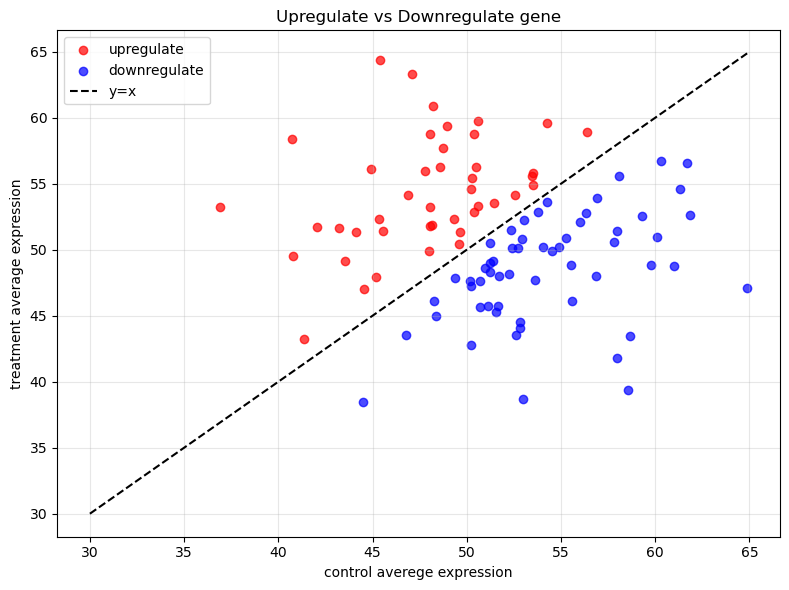

In [25]:
#create a scatter plot showing upregulate and downregulate gene
plt.figure(figsize=(8,6))
colors={'upregulate':'red','downregulate':'blue'}
summery_df=pd.DataFrame({
    'control_avg':data[control_cols].mean(axis=1),
    'treatment_avg':data[treatment_cols].mean(axis=1)
})

summery_df['Regulation']=summery_df.apply(
    lambda x:'upregulate' if x['treatment_avg']>x['control_avg']
        else'downregulate',axis=1
)

for reg in['upregulate','downregulate']:
    subset=summery_df[summery_df['Regulation']==reg]
    plt.scatter(subset['control_avg'],subset['treatment_avg'],
               c=colors[reg],label=reg,alpha=0.7)
    
    
plt.plot([30,summery_df[['control_avg','treatment_avg']].max().max()],
         [30,summery_df[['control_avg','treatment_avg']].max().max()],
        'k--',label='y=x')

plt.xlabel("control averege expression")
plt.ylabel("treatment average expression")
plt.title("Upregulate vs Downregulate gene")
plt.legend()
plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()